# Practical Machine Learning
# Lab 2


## k-Nearest Neighbor

In this lab, we are going to classify handwritten digits from the MNIST database using k-NN and Naive Bayes. This dataset consists of 60000 training images and 10000 testing images. Each image is labeled with one of 10 classes (0-9 digit). The images are gray-scale and have 28 pixels high and wide. We are going to use a subset divided as follows:
    
    ‘train_images.npy’ is a matrix of 1000 x 784, containing 1000 training images, each row is an image (28 x 28 = 784).
    ‘test_images.npy’ is a matrix of 500 x 784 containing 500 testing images.
    ‘train_labels.npy’ and ‘test_labels.npy’ contains the ground-truth labels.

![mnist_examples.png](attachment:mnist_examples.png)

Download the images and the ground-truth labels from [here](url). 


In [0]:
# import matplotlib and numpy libraries
# you should run it only once
import matplotlib.pyplot as plt
import numpy as np 

In [0]:
train_images = np.load('data/train_images.npy') # load training images
train_labels = np.load('data/train_labels.npy') # load training labels
image = train_images[0, :] # the first image
image = np.reshape(image, (28, 28)) 
plt.imshow(np.uint8(image))
plt.show()

## k-Nearest Neighbor

The **nearest neighbor** method takes a **test** example, compare it to every single **training** example, and predict the label of the **closest** training example.

In order to find the closest example(s), we have to define (or choose) a **metric**.

Instead of using the closest example in the training set, we can find the top **k** closest examples and predict their majority label (*classification*) or the mean of their labels (*regression*). This strategy is called **k-NN**.



![knn.jpeg](attachment:knn.jpeg)

An example of the difference between Nearest Neighbor and a 5-Nearest Neighbor classifier, using 2-dimensional points and 3 classes (red, blue, green). The colored regions show the decision boundaries induced by the classifier with an L2 distance. The white regions show points that are ambiguously classified (i.e. class votes are tied for at least two classes). Notice that in the case of a NN classifier, outlier datapoints (e.g. green point in the middle of a cloud of blue points) create small islands of likely incorrect predictions, while the 5-NN classifier smooths over these irregularities, likely leading to better generalization on the test data (not shown). Also note that the gray regions in the 5-NN image are caused by ties in the votes among the nearest neighbors (e.g. 2 neighbors are red, next two neighbors are blue, last neighbor is green).

The most common distances are:
    $$L_1(X, Y) = \sum_i{\mid X_i - Y_i \mid}$$
    $$L_2(X, Y) = \sqrt{\sum_i{(X_i - Y_i) ^ 2}}$$

# Execises

#### 1. Create the  'Knn_classifier' class in order to classify the MNIST testset.

In [0]:
class Knn_classifier:
    
    def __init__(self, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels
    
    # a. Write the classify_image(self, test_image, num_neighbors=3, metric='l2') function in order to classify 'test_image'
    # example using the k-NN method with 'num_neighbors' neighbors and 'metric' distance.
    def classify_image(self, test_image, num_neighbors=3, metric='l2'):
        # write your code here
        if(metric == 'l2'):   
            distances = np.sqrt(np.sum((self.train_images - test_image) ** 2, axis = 1))
        elif(metric == 'l1'):
            distances = np.sum(abs(self.train_images - test_image), axis = 1)
        else:
            print('Error! Metric {} is not defined!'.format(metric))
        
        sort_index = np.argsort(distances)
        sort_index = sort_index[:num_neighbors]
        nearest_labels = self.train_labels[sort_index] 
        histc = np.bincount(nearest_labels)
        
        return np.argmax(histc)
    
    # b. Write the classify_images(self, test_images, num_neighbors=3, metric='l2') function in order to predict the labels of 
    # the test images.
    def classify_images(self, test_images, num_neighbors=3, metric='l2'):
        # write your code here
        num_test_images = test_images.shape[0] 
        predicted_labels = np.zeros((num_test_images), np.int)
        
        for i in range(num_test_images): 
            if(i % 50 == 0):
                print('processing {}%...'.format(i / num_test_images * 100))
            predicted_labels[i] = self.classify_image(test_images[i, :], num_neighbors = num_neighbors, metric = metric)
        
        return predicted_labels
    
    # c. Define a function to compute the accurracy score given the predicted labels and the ground-truth labels.
    def accuracy_score(self, y_true, y_pred):
        # write your code here
        return (y_true == y_pred).mean()
    
    

#### 2. Compute the accuracy score of the 3-NN method on the test set using L_2 distance.

In [0]:
train_images = np.load('data/train_images.npy') # load training images
train_labels = np.load('data/train_labels.npy') # load training labels
test_images = np.load('data/test_images.npy') # load testing images
test_labels = np.load('data/test_labels.npy') # load testing labels

# write your code here
classifier = Knn_classifier(train_images, train_labels)

accuracy = classifier.accuracy_score(test_labels, predicted_labels)
print('the classifier accuracy using l2 distance and 3 neighbors is ', accuracy)

the classifier accuracy using l2 distance and 3 neighbors is  0.898


#### 3. Compute the confusion matrix of the previous classifier.

Confusion matrix: $$C = c_{i, j}$$ number of examples in class **i** that were classified as **j**.


In [0]:
# write your code here
def confusion_matrix_v2(y_true, y_pred): 
    num_classes = max(y_true.max(), y_pred.max()) + 1
    conf_matrix = np.zeros((num_classes, num_classes)) 
    
    for i in range(len(y_true)): 
        conf_matrix[int(y_true[i]), int(y_pred[i])] +=1
    return conf_matrix

conf_matrix = confusion_matrix_v2(test_labels, predicted_labels)
print(conf_matrix) 

[[ 51.   0.   0.   0.   0.   1.   1.   0.   0.   0.]
 [  0.  52.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   6.  47.   1.   0.   0.   1.   2.   0.   0.]
 [  0.   0.   0.  51.   0.   1.   0.   0.   0.   1.]
 [  0.   0.   0.   0.  44.   0.   0.   0.   0.   2.]
 [  2.   1.   1.   6.   0.  40.   1.   0.   0.   1.]
 [  0.   0.   0.   0.   0.   1.  47.   0.   0.   0.]
 [  1.   2.   0.   0.   1.   0.   0.  46.   0.   0.]
 [  1.   0.   2.   2.   1.   1.   1.   1.  36.   1.]
 [  0.   0.   1.   1.   3.   1.   0.   1.   0.  35.]]


#### 4. Plot the accuracy score of the k-NN method with  $k \in \{1, 3, 5, 7, 9\}$ and distance $L_2.$


processing 0.0%...
processing 10.0%...
processing 20.0%...
processing 30.0%...
processing 40.0%...
processing 50.0%...
processing 60.0%...
processing 70.0%...
processing 80.0%...
processing 90.0%...
processing 0.0%...
processing 10.0%...
processing 20.0%...
processing 30.0%...
processing 40.0%...
processing 50.0%...
processing 60.0%...
processing 70.0%...
processing 80.0%...
processing 90.0%...
processing 0.0%...
processing 10.0%...
processing 20.0%...
processing 30.0%...
processing 40.0%...
processing 50.0%...
processing 60.0%...
processing 70.0%...
processing 80.0%...
processing 90.0%...
processing 0.0%...
processing 10.0%...
processing 20.0%...
processing 30.0%...
processing 40.0%...
processing 50.0%...
processing 60.0%...
processing 70.0%...
processing 80.0%...
processing 90.0%...
processing 0.0%...
processing 10.0%...
processing 20.0%...
processing 30.0%...
processing 40.0%...
processing 50.0%...
processing 60.0%...
processing 70.0%...
processing 80.0%...
processing 90.0%...


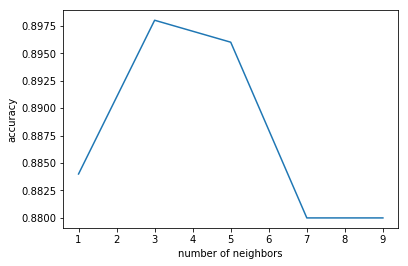

In [0]:
# write your code here
max_num_neighbors = 10
num_neighbors = [i for i in range(1, max_num_neighbors, 2)]
accuracy = np.zeros((len(num_neighbors)))

for n in range(len(num_neighbors)): 
    predicted_labels = classifier.classify_images(test_images, num_neighbors = num_neighbors[n], metric = 'l2')
    accuracy[n] = classifier.accuracy_score(test_labels, predicted_labels)
      
# Ploteaza punctele
plt.plot(num_neighbors, accuracy)

# Adauga etichete pentru fiecare axa
plt.xlabel('number of neighbors')
plt.ylabel('accuracy') 
plt.show()